In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('../Data Science/Kaggle_Data/titanic/train.csv')
df_test = pd.read_csv('../Data Science/Kaggle_Data/titanic/test.csv')
df_test_ = pd.read_csv('../Data Science/Kaggle_Data/titanic/gender_submission.csv')

In [3]:
df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
df_test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df_train['Age'].fillna(value=df_train['Age'].mean(), inplace=True)
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [9]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
df_test['Age'].fillna(value=df_test['Age'].mean(), inplace=True)
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
df_train = df_train.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
df_train_new = pd.get_dummies(df_train, columns=['Sex'])
df_train_new.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  Sex_female  \
0            1         0       3  22.0      1      0   7.2500       False   
1            2         1       1  38.0      1      0  71.2833        True   
2            3         1       3  26.0      0      0   7.9250        True   
3            4         1       1  35.0      1      0  53.1000        True   
4            5         0       3  35.0      0      0   8.0500       False   

   Sex_male  
0      True  
1     False  
2     False  
3     False  
4      True

In [12]:
df_test = df_test.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
df_test_new = df_test.merge(df_test_, on='PassengerId')
df_test_new = pd.get_dummies(df_test_new, columns=['Sex'])
df_test_new.head()

PassengerId  Pclass   Age  SibSp  Parch     Fare  Survived  Sex_female  \
0          892       3  34.5      0      0   7.8292         0       False   
1          893       3  47.0      1      0   7.0000         1        True   
2          894       2  62.0      0      0   9.6875         0       False   
3          895       3  27.0      0      0   8.6625         0       False   
4          896       3  22.0      1      1  12.2875         1        True   

   Sex_male  
0      True  
1     False  
2      True  
3      True  
4     False

In [13]:
df_train_new.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  Sex_female  \
0            1         0       3  22.0      1      0   7.2500       False   
1            2         1       1  38.0      1      0  71.2833        True   
2            3         1       3  26.0      0      0   7.9250        True   
3            4         1       1  35.0      1      0  53.1000        True   
4            5         0       3  35.0      0      0   8.0500       False   

   Sex_male  
0      True  
1     False  
2     False  
3     False  
4      True

D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


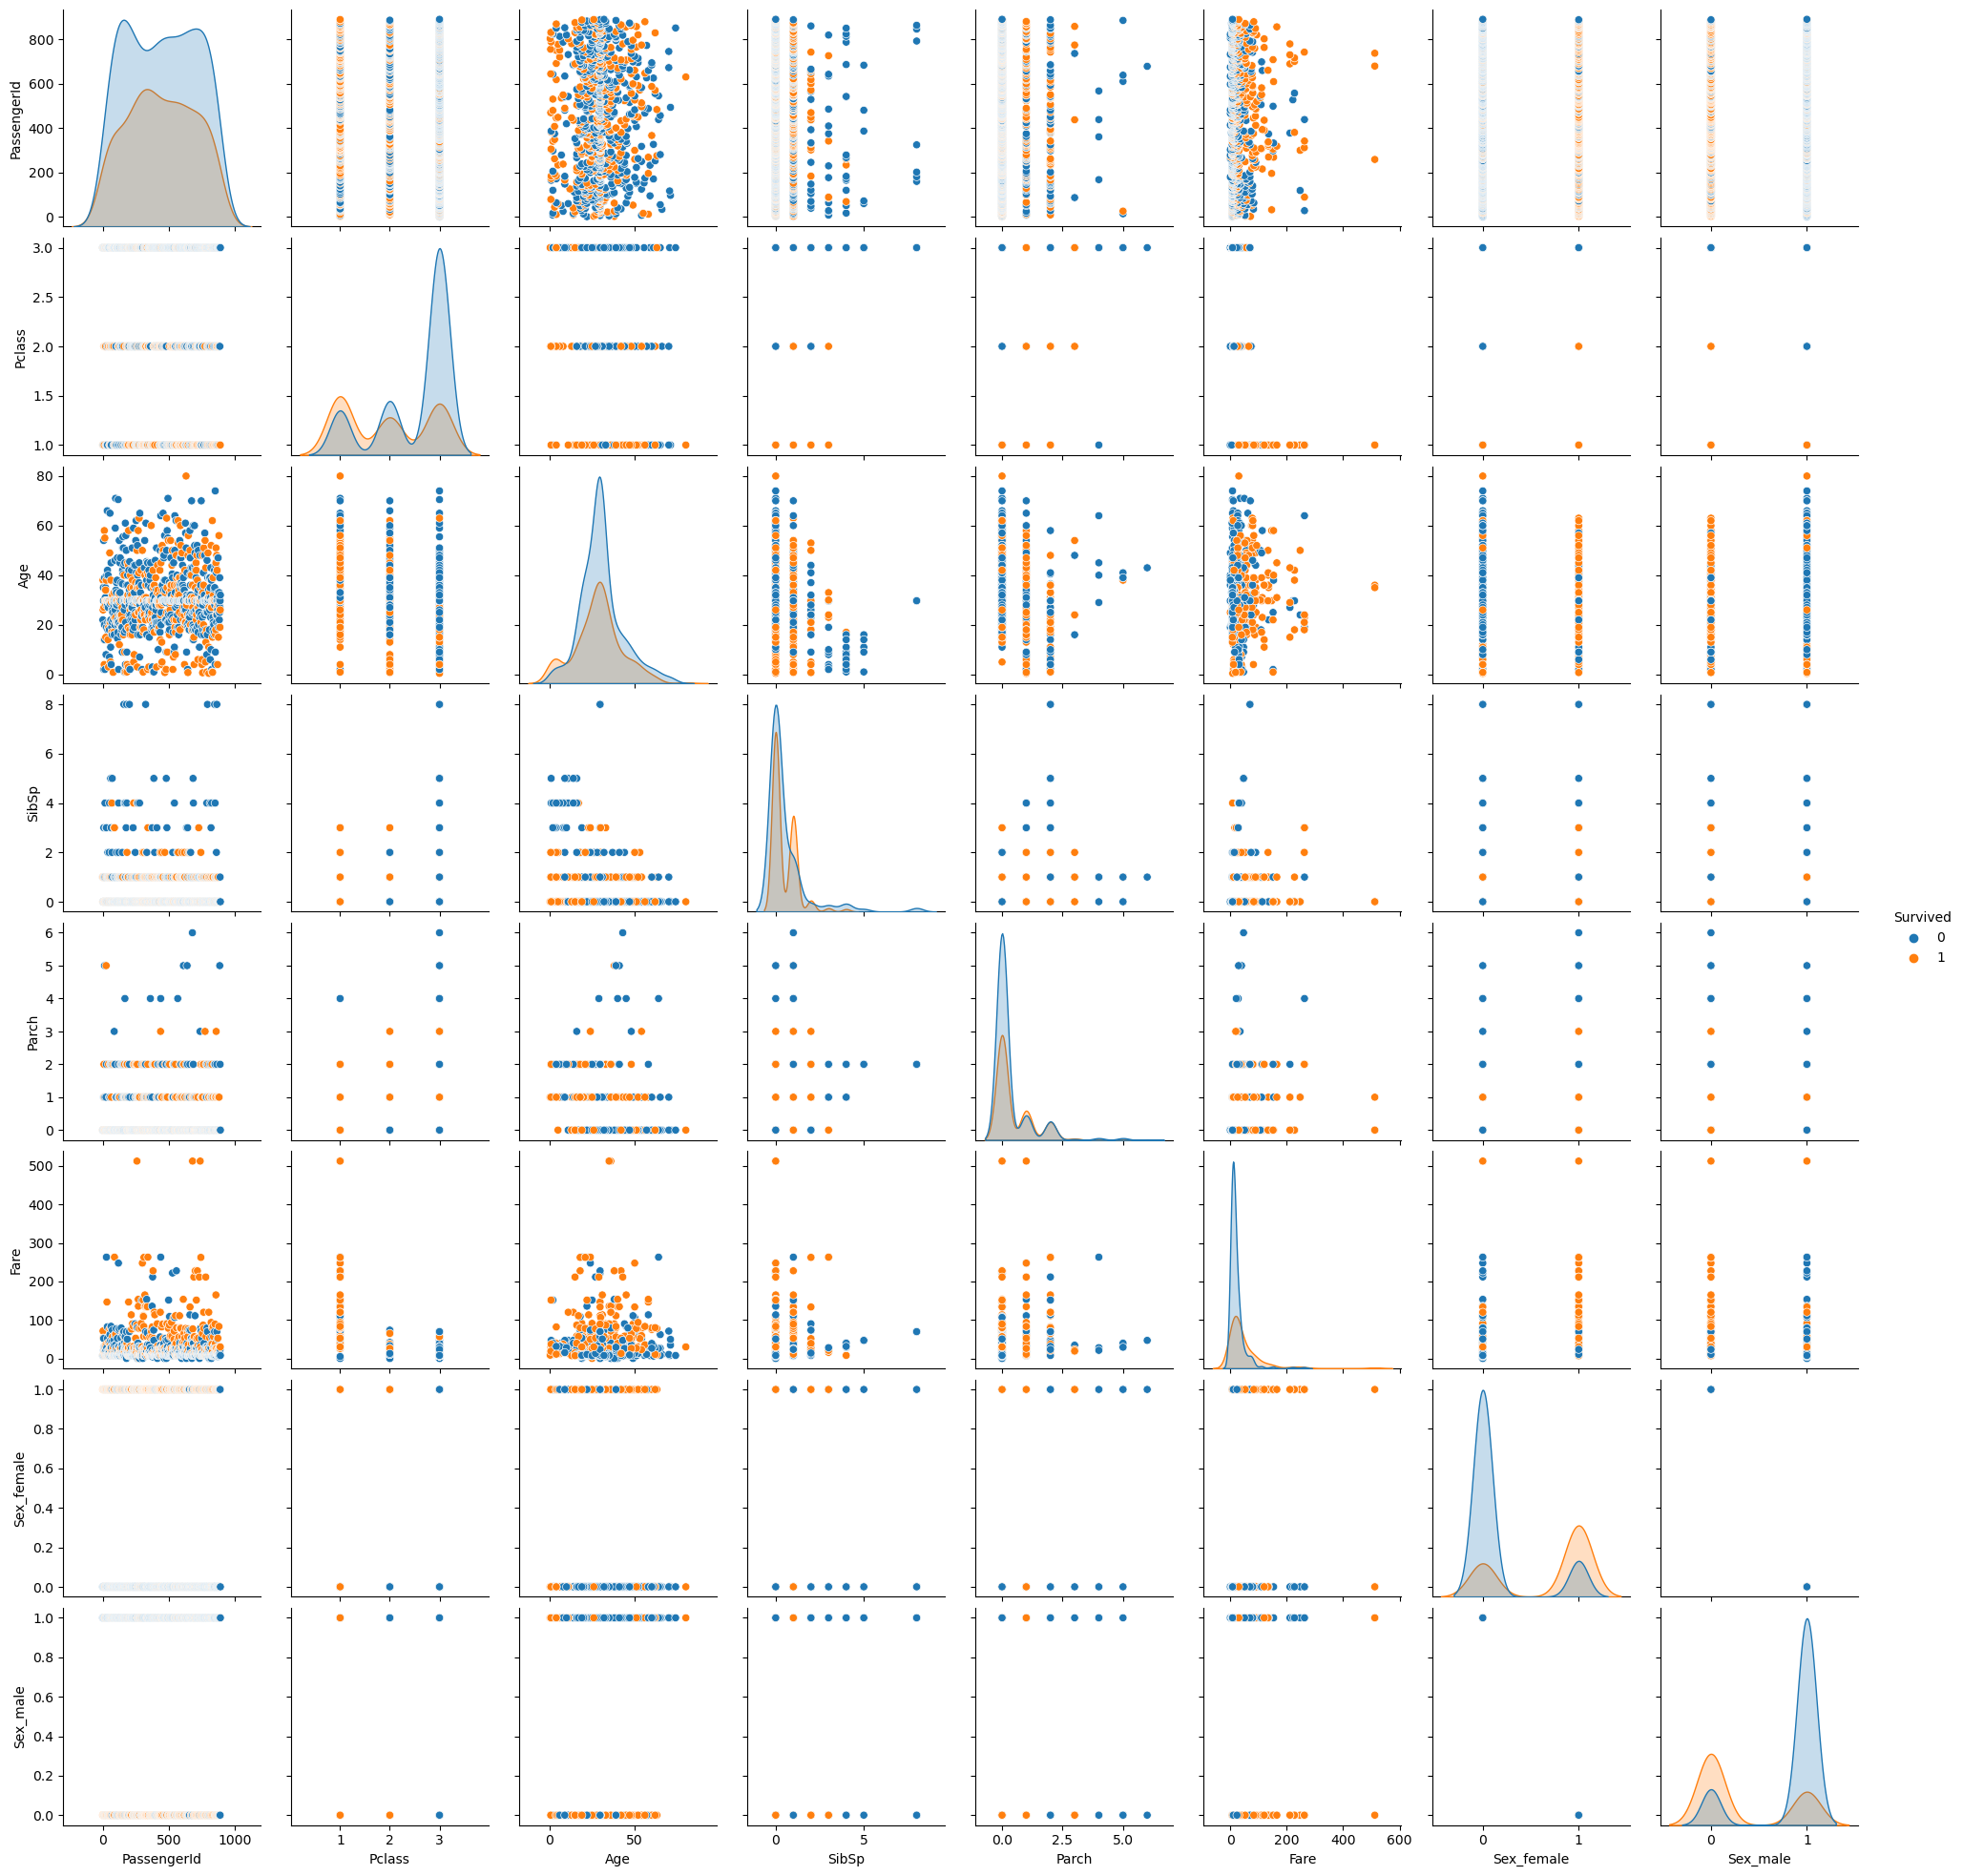

In [14]:
sns.pairplot(df_train_new, hue='Survived')

<Axes: xlabel='Sex_female', ylabel='count'>

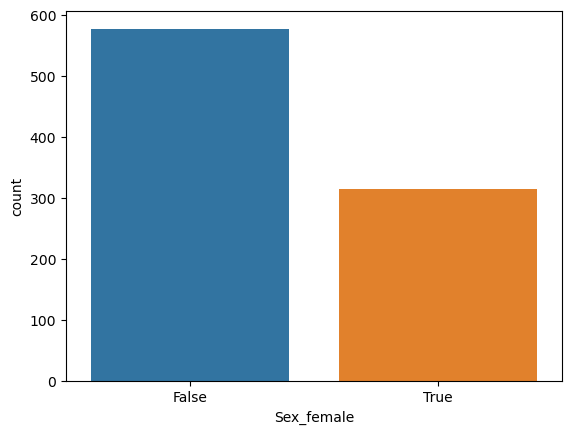

In [15]:
sns.countplot(data=df_train_new, x='Sex_female')

<Axes: xlabel='Sex_male', ylabel='count'>

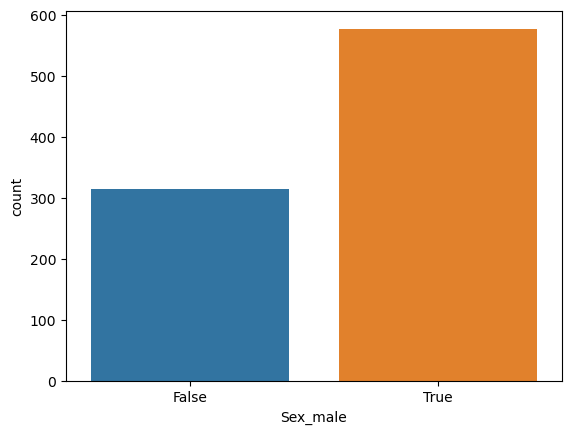

In [16]:
sns.countplot(data=df_train_new, x='Sex_male')

<Axes: xlabel='Age', ylabel='Count'>

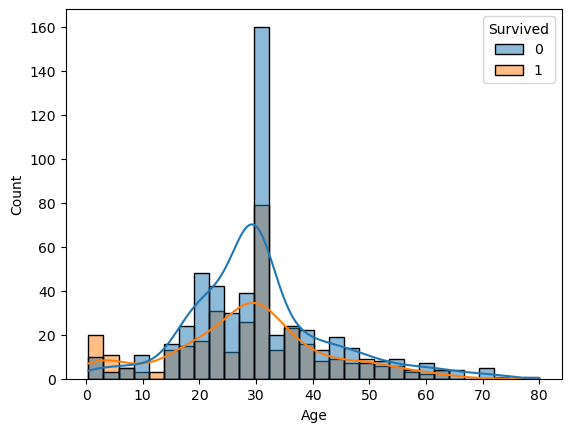

In [17]:
sns.histplot(data=df_train_new, x='Age', kde=True, hue='Survived')

In [18]:
from sklearn.model_selection import train_test_split

x_train = df_train_new.drop('Survived', axis=1)
y_train = df_train_new['Survived']

x_test = df_test_new.drop('Survived', axis=1)
x_test['Fare'].fillna(value=x_test['Fare'].mean(), inplace=True)
y_test = df_test_new['Survived']

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(891, 8) (891,)
(418, 8) (418,)


In [19]:
from sklearn.ensemble import RandomForestClassifier

RForest = RandomForestClassifier()
RForest.fit(x_train, y_train)

RandomForestClassifier()

Accuracy: 0.7751196172248804


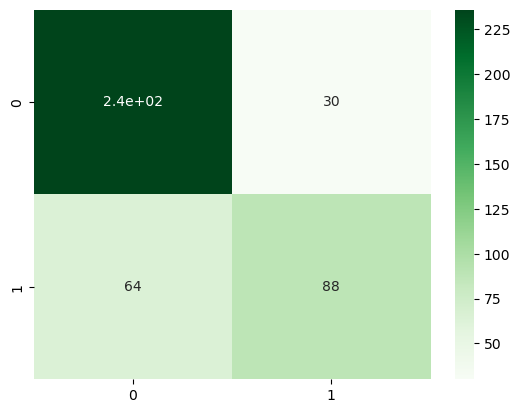

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred_RForest = RForest.predict(x_test)
cm = confusion_matrix(y_test, y_pred_RForest)
sns.heatmap(cm, annot=True, cmap='Greens')
print('Accuracy:', accuracy_score(y_test, y_pred_RForest))

In [21]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()
knc.fit(x_train, y_train)

KNeighborsClassifier()

Accuracy: 0.6483253588516746


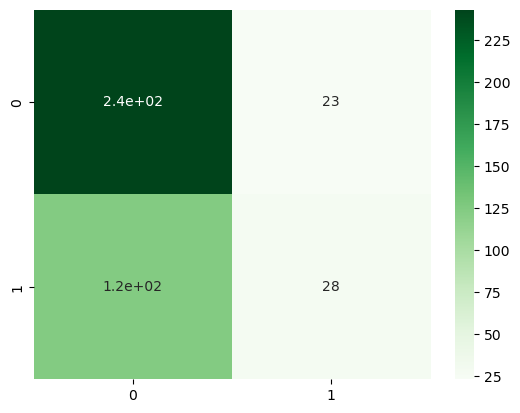

In [22]:
y_pred_knc = knc.predict(x_test)
cm = confusion_matrix(y_test, y_pred_knc)
sns.heatmap(cm, annot=True, cmap='Greens')
print('Accuracy:', accuracy_score(y_test, y_pred_knc))

In [23]:
from sklearn.linear_model import LogisticRegression

lreg = LogisticRegression()
lreg.fit(x_train, y_train)

D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Accuracy: 0.9473684210526315


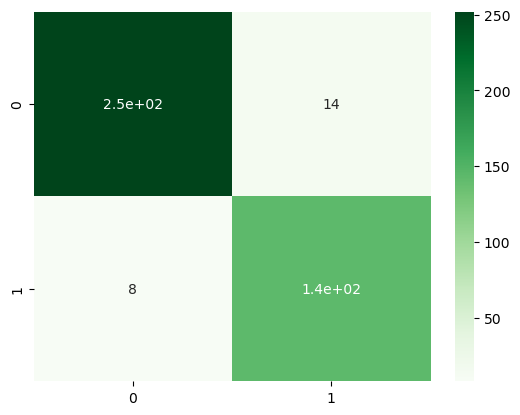

In [24]:
y_pred_lreg = lreg.predict(x_test)
cm = confusion_matrix(y_test, y_pred_lreg)
sns.heatmap(cm, annot=True, cmap='Greens')
print('Accuracy:', accuracy_score(y_test, y_pred_lreg))

In [25]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

Dtree = DecisionTreeClassifier()
Dtree.fit(x_train, y_train)

DecisionTreeClassifier()

[Text(0.45394736842105265, 0.9285714285714286, 'x[7] <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(0.23903508771929824, 0.7857142857142857, 'x[1] <= 2.5\ngini = 0.383\nsamples = 314\nvalue = [81, 233]'),
 Text(0.07894736842105263, 0.6428571428571429, 'x[2] <= 2.5\ngini = 0.1\nsamples = 170\nvalue = [9, 161]'),
 Text(0.03508771929824561, 0.5, 'x[1] <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.017543859649122806, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.05263157894736842, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.12280701754385964, 0.5, 'x[5] <= 28.856\ngini = 0.091\nsamples = 168\nvalue = [8, 160]'),
 Text(0.08771929824561403, 0.35714285714285715, 'x[5] <= 28.231\ngini = 0.182\nsamples = 69\nvalue = [7, 62]'),
 Text(0.07017543859649122, 0.21428571428571427, 'x[2] <= 56.0\ngini = 0.161\nsamples = 68\nvalue = [6, 62]'),
 Text(0.05263157894736842, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.0

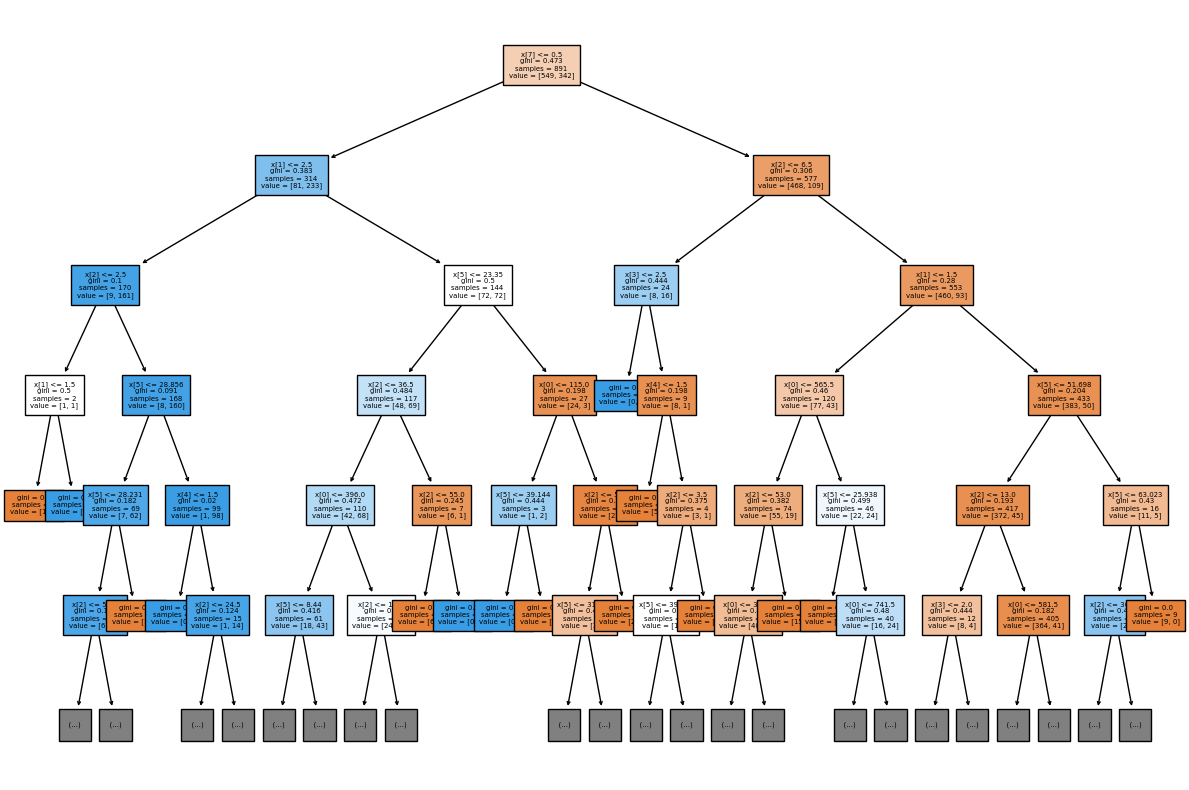

In [26]:
plt.figure(figsize=(15, 10))
plot_tree(Dtree, fontsize=5, filled=True, max_depth=5)

Accuracy: 0.8086124401913876


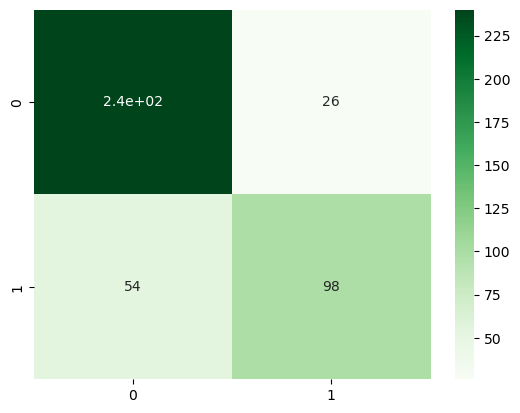

In [27]:
y_pred_Dtree = Dtree.predict(x_test)

cm = confusion_matrix(y_test, y_pred_Dtree)
sns.heatmap(cm, annot=True, cmap='Greens')
print('Accuracy:', accuracy_score(y_test, y_pred_Dtree))

In [28]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Accuracy: 0.8205741626794258


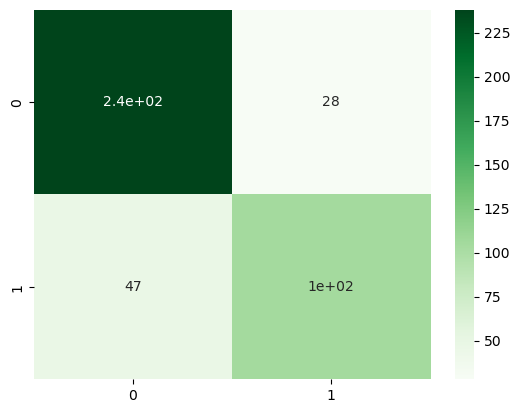

In [29]:
y_pred_xgb = xgb.predict(x_test)

cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, cmap='Greens')
print('Accuracy:', accuracy_score(y_test, y_pred_xgb))

In [31]:
import tensorflow as tf
import keras_tuner as kt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical

X = df_train_new.drop('Survived', axis=1)
Y = df_train_new['Survived']

x_train, x_cv, y_train, y_cv = train_test_split(X, Y, test_size=0.25, random_state=40)

x_train = np.asarray(x_train).astype('float32')
x_cv = np.asarray(x_cv).astype('float32')
x_test = np.asarray(x_test).astype('float32')

print(x_train.shape, y_train.shape)

(668, 8) (668,)


In [32]:
def build_model(hp):
    model = Sequential()
    counter = 0
    
    for i in range(hp.Int('layers', min_value=1, max_value=10)):
        if counter == 0:
            model.add(
                Dense(
                    hp.Int('units '+str(i), min_value=8, max_value=512, step=8),
                    activation=hp.Choice('activation '+str(i), values=['relu', 'tanh', 'sigmoid']),
                    input_dim=8
                )
            )
            model.add(Dropout(hp.Choice('dropout '+str(i), values=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))
        else:
            model.add(
                Dense(
                    hp.Int('units '+str(i), min_value=8, max_value=512, step=8),
                    activation=hp.Choice('activation '+str(i), values=['relu', 'tanh', 'sigmoid'])
                )
            )
            model.add(Dropout(hp.Choice('dropout '+str(i), values=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))
        
        counter += 1
    
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(
        optimizer=hp.Choice('optimizer', values=['rmsprop', 'sgd', 'adam', 'nadam', 'adadelta']),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

In [33]:
tuner = kt.RandomSearch(build_model,
                        objective='accuracy',
                        max_trials=10,
                        directory='Models',
                        project_name='Titanic_NN'
                       )

Reloading Tuner from Models\Titanic_NN\tuner0.json


In [34]:
tuner.search(x_train, y_train, epochs=10, validation_data=(x_cv, y_cv))

In [35]:
model_nn = tuner.get_best_models(num_models=1)[0]
model_nn.fit(x_train, y_train, epochs=50, verbose=1, batch_size=50, validation_data=(x_cv, y_cv))

Epoch 1/50


D:\Anaconda\Lib\site-packages\tensorflow\python\util\dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


14/14 [==============================] - 1s 16ms/step - loss: 0.0000e+00 - accuracy: 0.6302 - val_loss: 0.0000e+00 - val_accuracy: 0.5740
Epoch 2/50
14/14 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.6302 - val_loss: 0.0000e+00 - val_accuracy: 0.5740
Epoch 3/50
14/14 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.6302 - val_loss: 0.0000e+00 - val_accuracy: 0.5740
Epoch 4/50
14/14 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.6302 - val_loss: 0.0000e+00 - val_accuracy: 0.5740
Epoch 5/50
14/14 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.6302 - val_loss: 0.0000e+00 - val_accuracy: 0.5740
Epoch 6/50
14/14 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.6302 - val_loss: 0.0000e+00 - val_accuracy: 0.5740
Epoch 7/50
14/14 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.6302 - val_loss: 0.0000e+

14/14 [==============================] - 0s 1ms/step
Accuracy: 0.6363636363636364


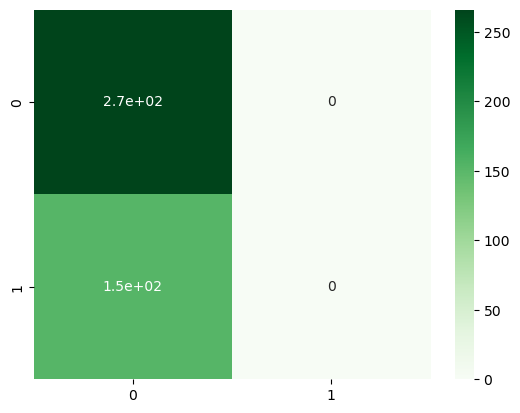

In [36]:
y_pred_nn = model_nn.predict(x_test)

cm = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(cm, annot=True, cmap='Greens')
print('Accuracy:', accuracy_score(y_test, y_pred_nn))

In [42]:
X = df_test_new.drop('Survived', axis=1)
X['Fare'].fillna(value=X['Fare'].mean(), inplace=True)

In [43]:
y_pred_whole = lreg.predict(X)

In [57]:
df_pred['Survived'] = pd.DataFrame(y_pred_whole, columns=['Survived'])
df_pred['PassengerID'] = X['PassengerId']

In [56]:
df_pred

Survived  PassengerID
0           0          892
1           0          893
2           0          894
3           0          895
4           1          896
..        ...          ...
413         0         1305
414         1         1306
415         0         1307
416         0         1308
417         0         1309

[418 rows x 2 columns]

In [58]:
cols = df_pred.columns.to_list()
cols

['Survived', 'PassengerID']

In [59]:
cols = cols[-1:] + cols[:-1]
cols

['PassengerID', 'Survived']

In [60]:
df_pred = df_pred[cols]
df_pred

PassengerID  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]

In [64]:
df_pred.reset_index(drop=True)

PassengerID  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]

In [67]:
df_pred.to_csv('../Data Science/Kaggle_Data/titanic/Titanic_Submission.csv', index=False)